In [3]:
library(rtracklayer)
library(ggplot2)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


At

In [4]:
list.files("../run_300322/coverage", full.names = T)

[1] "../run_300322/coverage/S1.dedup.bam.bw"
[2] "../run_300322/coverage/S2.dedup.bam.bw"
[3] "../run_300322/coverage/S3.dedup.bam.bw"
[4] "../run_300322/coverage/S4.dedup.bam.bw"

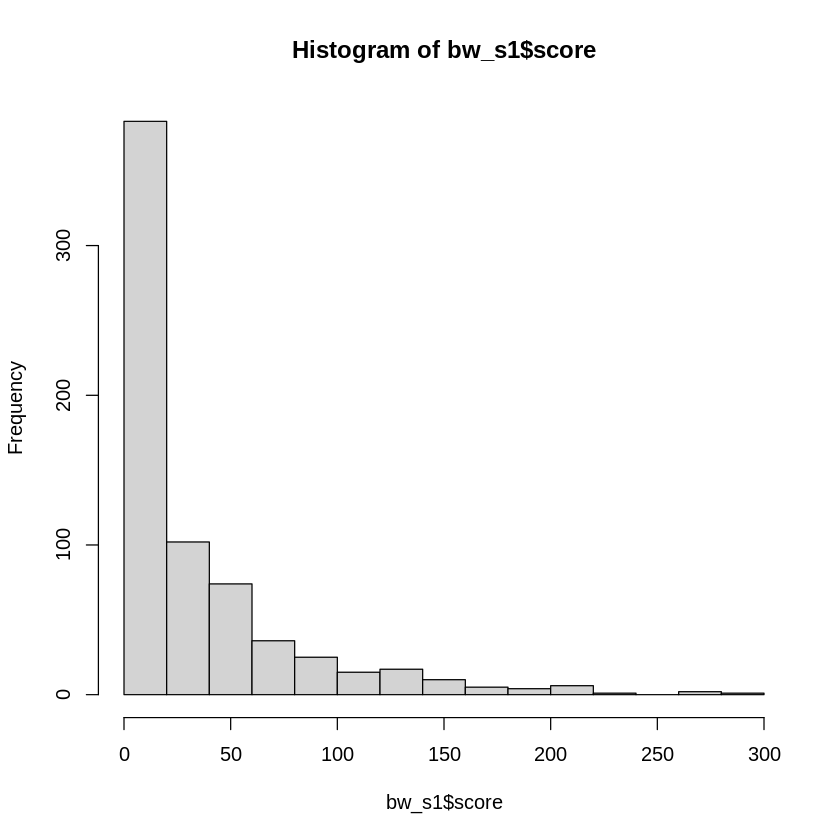

In [5]:
bw_s1 <- import.bw("../run_300322/coverage/S1.dedup.bam.bw")
hist(bw_s1$score)

,seqnames,start,end,width,strand,score
,<fct>,<int>,<int>,<int>,<fct>,<dbl>
1,SW161_genome,1,622700,622700,*,0
2,SW161_genome,622701,622750,50,*,3
3,SW161_genome,622751,622800,50,*,5
4,SW161_genome,622801,622900,100,*,8
5,SW161_genome,622901,622950,50,*,5
6,SW161_genome,622951,623000,50,*,2


seqnames,score
<fct>,<dbl>
SW161_genome,332
SW163_genome,278
SW166_genome,184
SW168_genome,500
SW170_genome,906
SW172_genome,671
SW174_genomes,33
SW176_genome,17
SW178_genome,12465


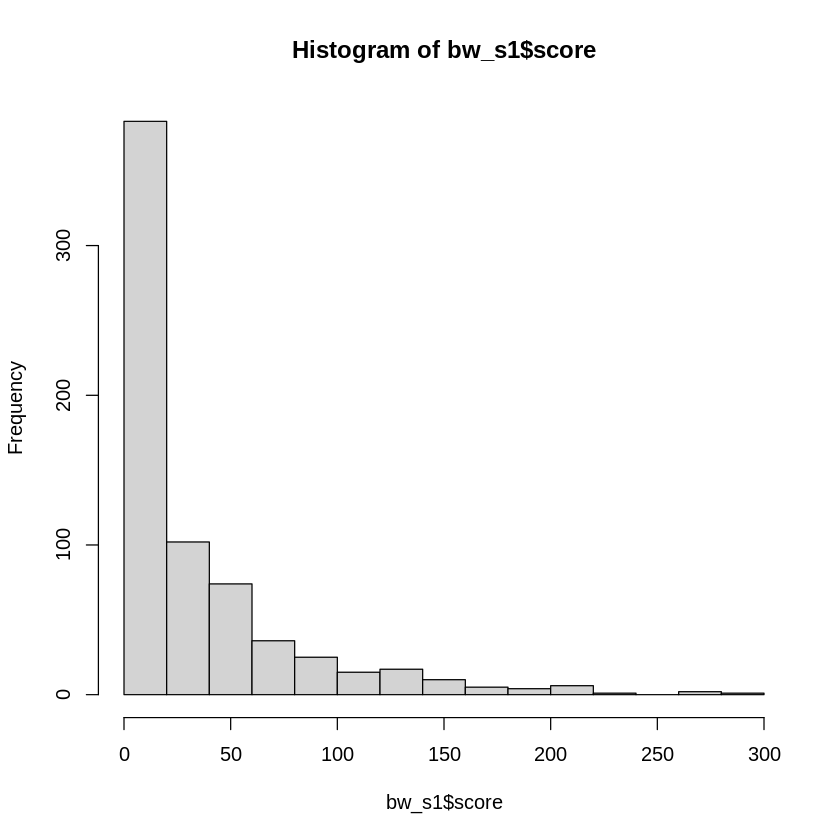

In [17]:
bw_s1 <- import.bw("../run_300322/coverage/S1.dedup.bam.bw")
hist(bw_s1$score)
bw_s1 <- as.data.frame(bw_s1)
head(bw_s1)
bw_s1_agg <- aggregate(score ~ seqnames, bw_s1, sum)
bw_s1_agg

,seqnames,start,end,width,strand,score
,<fct>,<int>,<int>,<int>,<fct>,<dbl>
1,SW161_genome,1,805750,805750,*,0
2,SW161_genome,805751,805850,100,*,1
3,SW161_genome,805851,3025613,2219763,*,0
4,SW163_genome,1,3025622,3025622,*,0
5,SW166_genome,1,3025619,3025619,*,0
6,SW168_genome,1,805650,805650,*,0


seqnames,score
<fct>,<dbl>
SW161_genome,1
SW163_genome,0
SW166_genome,0
SW168_genome,1
SW170_genome,0
SW172_genome,0
SW174_genomes,0
SW176_genome,0
SW178_genome,0


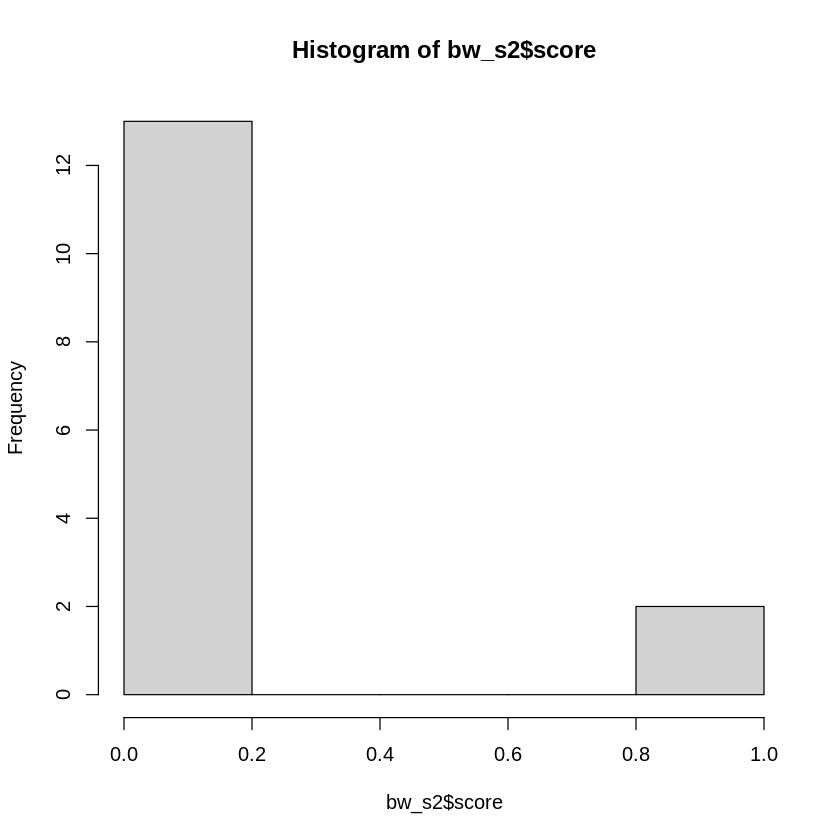

In [16]:
bw_s2 <- import.bw("../run_300322/coverage/S2.dedup.bam.bw")
hist(bw_s2$score)
bw_s2 <- as.data.frame(bw_s2)
head(bw_s2)
bw_s2_agg <- aggregate(score ~ seqnames, bw_s2, sum)
bw_s2_agg

seqnames,start,end,width,strand,score
<fct>,<int>,<int>,<int>,<fct>,<dbl>
SW141_genome,1,2602800,2602800,*,0
SW141_genome,2602801,2602850,50,*,9
SW141_genome,2602851,2602900,50,*,62
SW141_genome,2602901,2602950,50,*,109
SW141_genome,2602951,2603000,50,*,140
SW141_genome,2603001,2603050,50,*,131
SW141_genome,2603051,2603100,50,*,78
SW141_genome,2603101,2603150,50,*,29
SW141_genome,2603151,3025655,422505,*,0


seqnames,score
<fct>,<dbl>
SW141_genome,558
SW143_genome,0
SW144_genome,0
SW146_genome,164
SW149_genome,1
SW151_genome,0
SW152_genome,0
SW156_genome,0
SW157_genome,0


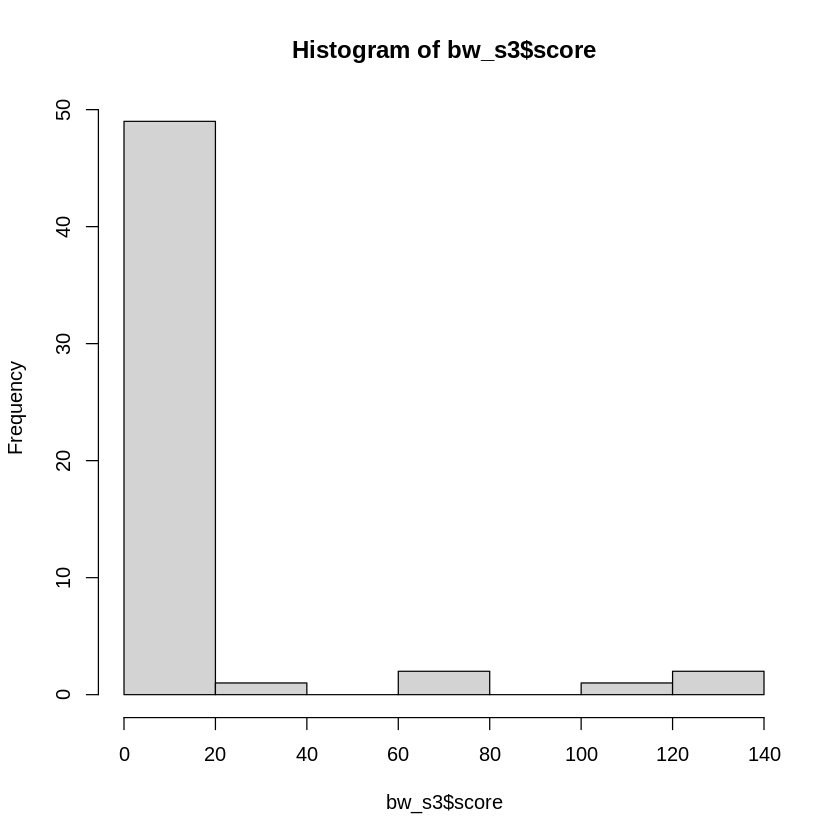

In [20]:
bw_s3 <- import.bw("../run_300322/coverage/S3.dedup.bam.bw")
hist(bw_s3$score)
bw_s3 <- as.data.frame(bw_s3)
bw_s3
bw_s3_agg <- aggregate(score ~ seqnames, bw_s3, sum)
bw_s3_agg

seqnames,start,end,width,strand,score
<fct>,<int>,<int>,<int>,<fct>,<dbl>
SW141_genome,1,2602900,2602900,*,0
SW141_genome,2602901,2603100,200,*,1
SW141_genome,2603101,3025655,422555,*,0
SW143_genome,1,3025655,3025655,*,0
SW144_genome,1,3025653,3025653,*,0
SW146_genome,1,1624300,1624300,*,0
SW146_genome,1624301,1624500,200,*,1
SW146_genome,1624501,3025654,1401154,*,0
SW149_genome,1,3025655,3025655,*,0


seqnames,score
<fct>,<dbl>
SW141_genome,1
SW143_genome,0
SW144_genome,0
SW146_genome,1
SW149_genome,0
SW151_genome,0
SW152_genome,0
SW156_genome,0
SW157_genome,0


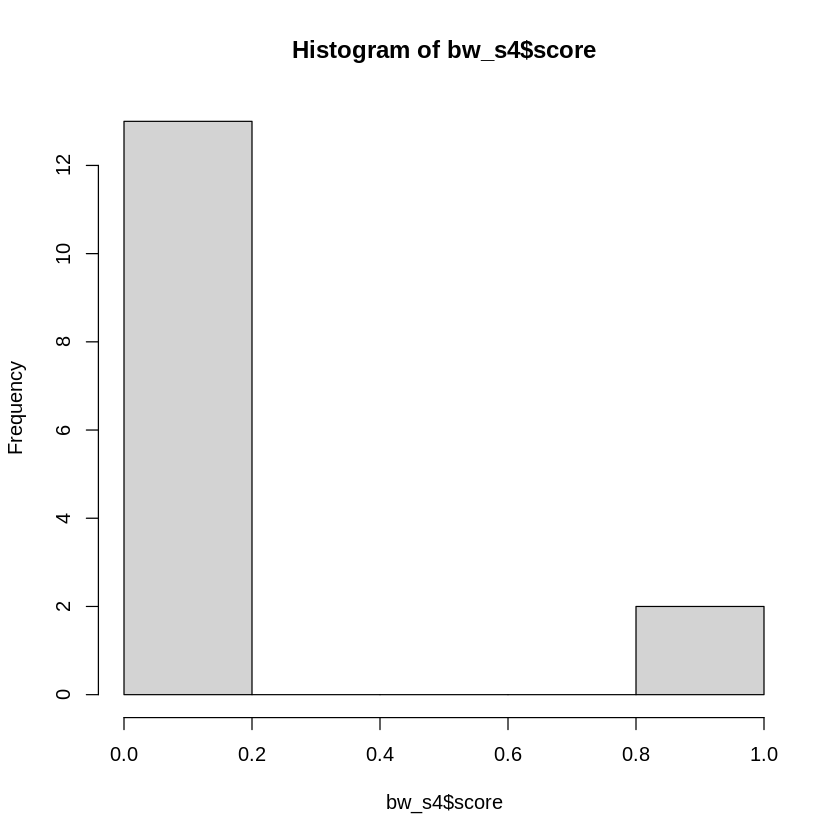

In [21]:
bw_s4 <- import.bw("../run_300322/coverage/S4.dedup.bam.bw")
hist(bw_s4$score)
bw_s4 <- as.data.frame(bw_s4)
bw_s4
bw_s4_agg <- aggregate(score ~ seqnames, bw_s4, sum)
bw_s4_agg